In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


In [2]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#Read Data
# Read data
df = pd.read_csv('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
# remove useless column
updated_df = df.drop(['Unnamed: 0'], axis='columns')
updated_df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [5]:
# check for missing and duplicate values
check_missing_val = updated_df.isnull().values.sum()
check_duplicate_val = updated_df.duplicated().sum()
print("Number of Missing values: ", check_missing_val)
print("Number of Duplicate values: ", check_duplicate_val)

Number of Missing values:  0
Number of Duplicate values:  0


In [6]:
# check for correlation of the data
updated_df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Using corr() to check for the correlation of our data, we can say that almost 98% is the correlation of our data, therefore it suggests that we have a strong linear relationship.

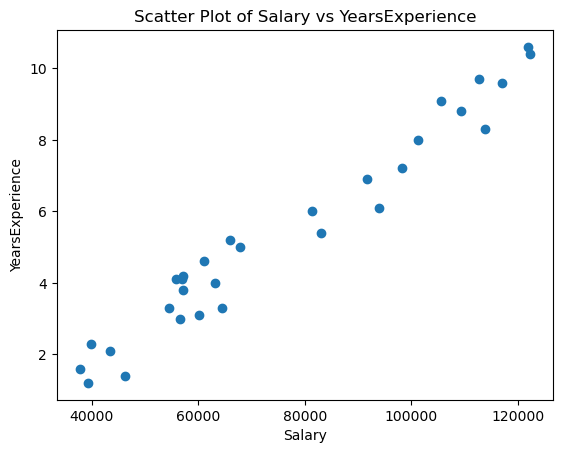

In [7]:
# Plot the points using scatter plot to visualize our data
plt.scatter(updated_df['Salary'], updated_df['YearsExperience'])
plt.title('Scatter Plot of Salary vs YearsExperience')
plt.xlabel('Salary')
plt.ylabel('YearsExperience')

plt.show()

In [8]:
# For this dataset, I am going to use train_test_split to predict the salary for more than 11 years of experience
from sklearn.model_selection import train_test_split

# Set the X = features and y = target
X = updated_df[['YearsExperience']].values
y = updated_df.Salary

# Set our train and test variable and also the test_size for 20%
# that means that our train data would be 80% and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a model and fit
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [9]:
# We will predict our X_test value and see if its align to our actual test data
X_test_values = X_test
y_test_predicted = lr_model.predict(X_test_values)

#Create a dataframe for the X_test_values
X_test_values_df = pd.DataFrame(X_test_values, columns=['YearsExperience'])

# Reset the index for X_test_values_df
X_test_values_df.reset_index(drop=True, inplace=True)

#Create a dataframe for the predicted values (y_test_predicted)
y_test_predicted_df = pd.DataFrame(pd.Series(y_test_predicted, name='Predicted Salary'))

# Reset the index for y_predicted_df
y_test_predicted_df.reset_index(drop=True, inplace=True)

#Create a Dataframe for the actual target values (y_test)
y_test_df = pd.DataFrame(pd.Series(y_test, name='Actual Salary'))

# Reset the index for y_test_df
y_test_df.reset_index(drop=True, inplace=True)

#Concatenate the DataFrame horizontally to create a final DataFrame
final_df = pd.concat([X_test_values_df, y_test_df, y_test_predicted_df], axis=1)
final_df

,YearsExperience,Actual Salary,Predicted Salary
0,10.6,121873.0,124820.809859
1,6.1,93941.0,82113.109264
2,4.2,57082.0,64080.969013
3,3.3,64446.0,55539.428894
4,4.1,56958.0,63131.909000
5,5.4,83089.0,75469.689172


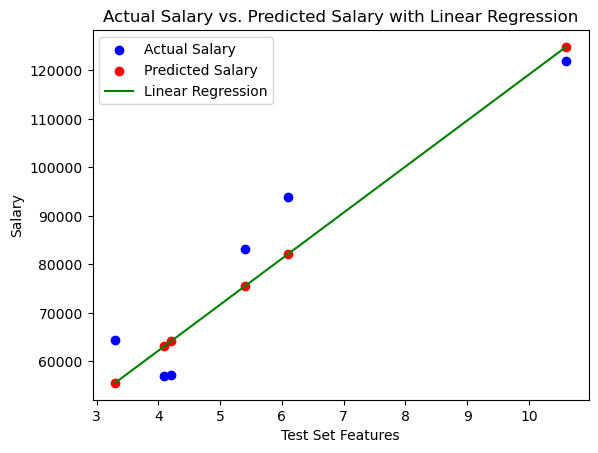

Coefficients:  [9490.60013227] Intecept:  24220.4484573636
Linear Model Prediction Percentage: 88.54%


In [10]:
# Now we will plot our Actual and Predicted Salary to compare the value when we use Linear Regression

# Plot 'Actual Salary' against the test set features
plt.scatter(final_df.iloc[:, 0], final_df['Actual Salary'], color='blue', label='Actual Salary')

# Plot 'Predicted Salary' against the test set features
plt.scatter(final_df.iloc[:, 0], final_df['Predicted Salary'], color='red', label='Predicted Salary')

# Get the coefficient and intercept
coef = lr_model.coef_
intercept = lr_model.intercept_ 

# Plot the line of linear regression
x_values = np.linspace(final_df.iloc[:, 0].min(), final_df.iloc[:, 0].max(), 100)
y_values = coef[0] * x_values + intercept
plt.plot(x_values, y_values, color='green', label='Linear Regression')

# Set labels and title
plt.xlabel('Test Set Features')
plt.ylabel('Salary')
plt.title('Actual Salary vs. Predicted Salary with Linear Regression')

# Add legend
plt.legend()

# Show the plot
plt.show()

# Get the Linear Model score or R-square score of our train data and convert in into a percentage with two decimal places
lr_model_score = lr_model.score(X_test, y_test)
lr_model_percentage = round(lr_model_score * 100, 2)

print("Coefficients: ", coef, "Intecept: ", intercept)
print("Linear Model Prediction Percentage: {}%".format(lr_model_percentage))

We say here that our Linear Regression Model is not highly accurate since it has only a 87.11% accuracy for predicting the values for our test data.

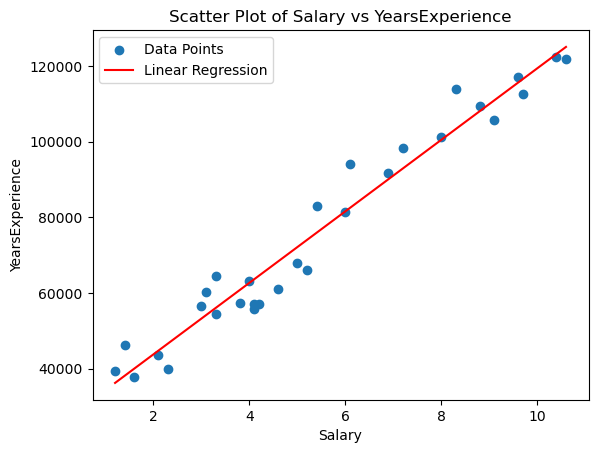

Linear Model Prediction Percentage: 95.7%


In [11]:
# Now, we will plot our Linear Regression Model on our Actual Data
%matplotlib inline

# Create a model and fit for our actual data
lr_model.fit(X, y)
y_predicted = lr_model.predict(X)

# Plot the points using scatter plot to visualize our data
plt.scatter(X,y, label='Data Points')

# Plot the Linear Regression Line

plt.plot(X, y_predicted, color='red', label='Linear Regression')

plt.title('Scatter Plot of Salary vs YearsExperience')
plt.xlabel('Salary')
plt.ylabel('YearsExperience')

plt.legend() 
plt.show()

# Get the Linear Model score or R-square score of our actual data and convert in into a percentage with two decimal places
lr_model_score = lr_model.score(X, y)
lr_model_percentage = round(lr_model_score * 100, 2)
print("Linear Model Prediction Percentage: {}%".format(lr_model_percentage))

Based on our plot with the actual value, we can see that some are accurately predicted while others are not.


Now, to make use of our train_test_split, we will try to predict new values based on the YearsExperience.

In [12]:
# I will create a new DataFrame with values [11.5, 12.3, 13.8, 14.1, 15.7]
new_YearsExperience = [11.5, 12.3, 13.8, 14.1, 15.7]
new_df = pd.DataFrame({'New_YearsExperience': new_YearsExperience})
new_df

,New_YearsExperience
0,11.5
1,12.3
2,13.8
3,14.1
4,15.7


In [13]:
# we will predict our salary for this values
new_X = new_df[['New_YearsExperience']]
new_predicted_salary = lr_model.predict(new_X)

# store the new_predicted_salary to a DataFrame
new_predicted_salary_df = pd.DataFrame({'New_PredictedSalary': new_predicted_salary})

#Concat the new_X and new_predicted_salary_df
final_new_df = pd.concat([new_X, new_predicted_salary_df], axis=1)
final_new_df

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,New_YearsExperience,New_PredictedSalary
0,11.5,133522.770663
1,12.3,141082.740520
2,13.8,155257.684003
3,14.1,158092.672699
4,15.7,173212.612413


This is my predicted data using the Linear Regression with newer data. However, I can say that, this may not be the best option of model, or maybe I can improve my model by adding more features or by adding more data to train

Conclusion:
    
    Doing this activity, gives me a clear understanding of using train_test_split of the data. When I try to get the Linear Model Score of the test data, it is higher than the actual data. 
    
    
    I will get back to this dataset after learning more models and improve my Linear Model Score, and give a more clearer conclusion.
    
    Thank you for this practice dataset.
   